ACGPN - https://github.com/levindabhi/ACGPN

This network is highly inspired from the network provided in the above repository.

Due to the problem of COVID-19, many people have shifted to online shopping for various items and Clothing is one of those items, but the people are generally confused weather to buy the product or not as they are unaware how it will look upon them.

So, here is the solution.
This network is a Virtual Try-On Network(VTON) which helps user to try on different clothes but virtually.

For now this model is trained to work with tops but the future scope includes to extend this network for other accessories as well.

### Below is the complete implementation of the code
### It is highly recommended that you proceed the way code is written to avoid any errors or ambiguites.

##Make sure that the runtime of this notebook is choosen to be **GPU**

# ACGPN

In [ ]:
!pwd

/content


In [1]:

# Here we import the main AGCPN Model
!git clone https://github.com/BeingHomosapien/ACGPN
%cd ACGPN

Cloning into 'ACGPN'...
remote: Enumerating objects: 78, done.
remote: Counting objects: 100% (78/78), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 78 (delta 2), reused 78 (delta 2), pack-reused 0
Unpacking objects: 100% (78/78), done.
/content/ACGPN


In [2]:
!pip install ninja

     |████████████████████████████████| 112kB 18.7MB/s 


In [3]:
import gdown
import numpy as np
from PIL import Image
import IPython
import os
import sys

from predict_pose import generate_pose_keypoints

In [4]:
!mkdir Data_preprocessing/test_color
!mkdir Data_preprocessing/test_colormask
!mkdir Data_preprocessing/test_edge
!mkdir Data_preprocessing/test_img
!mkdir Data_preprocessing/test_label
!mkdir Data_preprocessing/test_mask
!mkdir Data_preprocessing/test_pose
!mkdir inputs
!mkdir inputs/img
!mkdir inputs/cloth

In [5]:
%cd pose
!gdown --id 1hOHMFHEjhoJuLEQY0Ndurn5hfiA9mwko
%cd ..

/content/ACGPN/pose
Downloading...
From: https://drive.google.com/uc?id=1hOHMFHEjhoJuLEQY0Ndurn5hfiA9mwko
To: /content/ACGPN/pose/pose_iter_440000.caffemodel
209MB [00:05, 41.2MB/s]
/content/ACGPN


In [6]:
!git clone https://github.com/BeingHomosapien/Self-Correction-Human-Parsing-for-ACGPN
!git clone https://github.com/priyanshu-shubham/U-2-Net.git

Cloning into 'Self-Correction-Human-Parsing-for-ACGPN'...
remote: Enumerating objects: 637, done.
remote: Counting objects: 100% (637/637), done.
remote: Compressing objects: 100% (525/525), done.
remote: Total 637 (delta 105), reused 637 (delta 105), pack-reused 0
Receiving objects: 100% (637/637), 3.65 MiB | 29.01 MiB/s, done.
Resolving deltas: 100% (105/105), done.
Cloning into 'U-2-Net'...
remote: Enumerating objects: 88, done.
remote: Counting objects: 100% (88/88), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 88 (delta 7), reused 81 (delta 3), pack-reused 0
Unpacking objects: 100% (88/88), done.


In [7]:
#for segmentation mask generation
url = 'https://drive.google.com/uc?id=1k4dllHpu0bdx38J7H28rVVLpU-kOHmnH'
output = 'lip_final.pth'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1k4dllHpu0bdx38J7H28rVVLpU-kOHmnH
To: /content/ACGPN/lip_final.pth
267MB [00:05, 44.7MB/s]


'lip_final.pth'

In [8]:
# Here we are working with the popular U-Net that is used for image segmentation and mask formation

%cd U-2-Net
!mkdir saved_models
!mkdir saved_models/u2net
!mkdir saved_models/u2netp
!gdown --id 1rbSTGKAE-MTxBYHd-51l2hMOQPT_7EPy -O saved_models/u2netp/u2netp.pth
!gdown --id 1ao1ovG1Qtx4b7EoskHXmi2E9rp5CHLcZ -O saved_models/u2net/u2net.pth
import u2net_load
import u2net_run
u2net = u2net_load.model(model_name = 'u2netp')
%cd ..

/content/ACGPN/U-2-Net
Downloading...
From: https://drive.google.com/uc?id=1rbSTGKAE-MTxBYHd-51l2hMOQPT_7EPy
To: /content/ACGPN/U-2-Net/saved_models/u2netp/u2netp.pth
4.68MB [00:00, 41.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ao1ovG1Qtx4b7EoskHXmi2E9rp5CHLcZ
To: /content/ACGPN/U-2-Net/saved_models/u2net/u2net.pth
176MB [00:01, 144MB/s]
...load U2NEP---4.7 MB
/content/ACGPN


In [9]:
!mkdir checkpoints
gdown.download('https://drive.google.com/uc?id=1UWT6esQIU_d4tUm8cjxDKMhB8joQbrFx',output='checkpoints/ACGPN_checkpoints.zip', quiet=False)
%cd checkpoints
!unzip ACGPN_checkpoints
%cd ..

Downloading...
From: https://drive.google.com/uc?id=1UWT6esQIU_d4tUm8cjxDKMhB8joQbrFx
To: /content/ACGPN/checkpoints/ACGPN_checkpoints.zip
524MB [00:03, 148MB/s]


/content/ACGPN/checkpoints
Archive:  ACGPN_checkpoints.zip
   creating: label2city/
  inflating: label2city/latest_net_G.pth  
  inflating: label2city/latest_net_G1.pth  
  inflating: label2city/latest_net_G2.pth  
  inflating: label2city/latest_net_U.pth  
  inflating: label2city/opt.txt      
/content/ACGPN


### Please upload your cloth image below 
(Here select the file of the cloth you want to try-on, remeber it should be a top and it should be in .jpg format)

---
## For examples, have a look at https://github.com/priyanshu-shubham/VTONImages


In [10]:
%cd inputs/cloth
from google.colab import files
uploaded = files.upload()
%cd ..
%cd ..

/content/ACGPN/inputs/cloth


Saving 000378_1.jpg to 000378_1.jpg
/content/ACGPN/inputs
/content/ACGPN


### Please upload your person image below
(Here upload your image and note that it should be in .jpg format)

In [11]:
%cd inputs/img
from google.colab import files
uploaded = files.upload()
%cd ..
%cd ..

/content/ACGPN/inputs/img


Saving 000016_0.jpg to 000016_0.jpg
/content/ACGPN/inputs
/content/ACGPN


In [12]:
sorted(os.listdir('inputs/cloth'))

['000378_1.jpg']

In [13]:
cloth_name = '000001_1.png'
cloth_path = os.path.join('inputs/cloth', sorted(os.listdir('inputs/cloth'))[0])
cloth = Image.open(cloth_path)
cloth = cloth.resize((192, 256), Image.BICUBIC).convert('RGB')
cloth.save(os.path.join('Data_preprocessing/test_color', cloth_name))

u2net_run.infer(u2net, 'Data_preprocessing/test_color', 'Data_preprocessing/test_edge')

Generating mask for: 000001_1.png
Saving output at Data_preprocessing/test_edge/000001_1.png


In [14]:
os.listdir('inputs/img')

['000016_0.jpg']

In [15]:
import time

start_time = time.time()
img_name = '000001_0.png'
img_path = os.path.join('inputs/img', sorted(os.listdir('inputs/img'))[0])
img = Image.open(img_path)
img = img.resize((192,256), Image.BICUBIC)

img_path = os.path.join('Data_preprocessing/test_img', img_name)
img.save(img_path)
resize_time = time.time()
print('Resized image in {}s'.format(resize_time-start_time))

!python3 Self-Correction-Human-Parsing-for-ACGPN/simple_extractor.py --dataset 'lip' --model-restore 'lip_final.pth' --input-dir 'Data_preprocessing/test_img' --output-dir 'Data_preprocessing/test_label'
parse_time = time.time()
print('Parsing generated in {}s'.format(parse_time-resize_time))

pose_path = os.path.join('Data_preprocessing/test_pose', img_name.replace('.png', '_keypoints.json'))
generate_pose_keypoints(img_path, pose_path)
pose_time = time.time()
print('Pose map generated in {}s'.format(pose_time-parse_time))

Resized image in 0.012697458267211914s
100% 1/1 [00:00<00:00,  4.42it/s]
Parsing generated in 40.998881578445435s
File saved at Data_preprocessing/test_pose/000001_0_keypoints.json
Pose map generated in 10.71053671836853s


In [16]:
!rm -rf Data_preprocessing/test_pairs.txt
with open('Data_preprocessing/test_pairs.txt','w') as f:
    f.write('000001_0.png 000001_1.png')

In [17]:
!python test.py

?
------------ Options -------------
aspect_ratio: 1.0
batchSize: 1
checkpoints_dir: ./checkpoints
cluster_path: features_clustered_010.npy
continue_train: False
data_type: 32
datapairs: test_pairs.txt
dataroot: Data_preprocessing/
display_winsize: 512
engine: None
export_onnx: None
fineSize: 512
gpu_ids: [0]
how_many: 1000
input_nc: 3
isTrain: False
label_nc: 20
loadSize: 512
max_dataset_size: inf
model: pix2pixHD
nThreads: 1
n_blocks_global: 4
n_blocks_local: 3
n_downsample_global: 4
n_local_enhancers: 1
name: label2city
netG: global
ngf: 64
niter_fix_global: 0
no_flip: False
norm: instance
ntest: inf
onnx: None
output_nc: 3
phase: test
resize_or_crop: scale_width
results_dir: ./results/
serial_batches: True
tf_log: False
use_dropout: False
use_encoded_image: False
verbose: False
which_epoch: latest
-------------- End ----------------
CustomDatasetDataLoader
dataset [AlignedDataset] was created
Data_preprocessing/test_label label
Data_preprocessing/test_img img
Data_preprocessing/tes

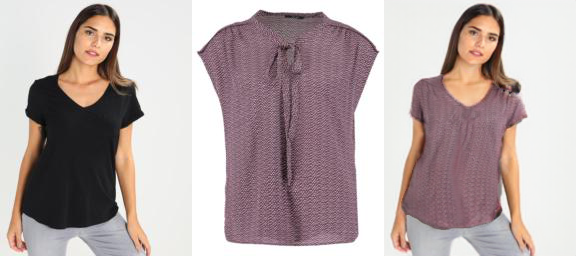

In [18]:
# Here is a Sample Output of the Model 

output_grid = np.concatenate([np.array(Image.open('Data_preprocessing/test_img/000001_0.png')),
                np.array(Image.open('Data_preprocessing/test_color/000001_1.png')),
                np.array(Image.open('results/test/try-on/000001_0.png'))], axis=1)
image_grid = Image.fromarray(output_grid)
image_grid

### Check results in 'results' folder!

In [ ]:
!pwd

/content/ACGPN


**Deleting all images**

In [ ]:
!rm -rf Data_preprocessing/test_color/*
!rm -rf Data_preprocessing/test_colormask/*
!rm -rf Data_preprocessing/test_edge/*
!rm -rf Data_preprocessing/test_img/*
!rm -rf Data_preprocessing/test_label/*
!rm -rf Data_preprocessing/test_mask/*
!rm -rf Data_preprocessing/test_pose/*
!rm -rf inputs/cloth/*
!rm -rf inputs/img/*

In [ ]:
!rm -rf results/*

In [ ]:
%cd /content/

/content
